In [ ]:
import pandas as pd
import networkx as nx
import csv

# Load data from Excel file
df = pd.read_excel('SNA_All_Nodes.xlsx')

# Create a directed graph using NetworkX
# G = nx.DiGraph()

# Add edges from the DataFrame
# for _, row in df.iterrows():
#     G.add_edge(row['Source'], row['Target'])

G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calculate degree centrality
in_degree_centrality = nx.in_degree_centrality(G)


# Print all entries in sorted order
sorted_nodes = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)
#print(len(sorted_centrality))
# Print the top 5 entries
# write nodes and in-degree centrality to a CSV file
with open('in_degree_centrality.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Node', 'In-degree centrality'])
    for node in sorted_nodes:
        writer.writerow([node, str(in_degree_centrality[node])])

In [ ]:

# G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])
l_user = []
# calculate the eigenvector centrality using numpy
eigen_centrality = nx.eigenvector_centrality_numpy(G)

# print the results
# for node in eigen_centrality:
#     print("Node {}: {:.10f}".format(node, eigen_centrality[node]))

sorted_nodes = sorted(eigen_centrality, key=eigen_centrality.get, reverse=True)

# for node in sorted_nodes:
#   l_user.append(node)
  # print(node, eigen_centrality[node])

with open('eigen_centrality_1.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Node', 'eigen_centrality'])
    for node in sorted_nodes:
        writer.writerow([node, str(eigen_centrality[node])])

In [ ]:
# print("Number of nodes:", G.number_of_nodes())
# print("Number of edges:", G.number_of_edges())


# degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# degree_count = pd.Series(degree_sequence).value_counts().sort_index()
# fig, ax = plt.subplots()
# ax.bar(degree_count.index, degree_count.values, width=0.8, color='b')
# ax.set_xlabel('Degree')
# ax.set_ylabel('Count')
# ax.set_title('Degree Distribution')
# plt.show()


In [ ]:
average_degree = sum(dict(G.degree()).values()) / len(G)
print("Average degree distribution:", average_degree)

Average degree distribution: 2.266900096007229


In [ ]:
connected_components = list(nx.connected_components(G))
print("Number of connected components:", len(connected_components))
print("Size of connected components:", [len(c) for c in connected_components])


In [ ]:
# try 01
from pprint import pprint
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import csv
import requests

!pip3 install praw

import praw

reddit = praw.Reddit(client_id='8qmW0-R20V0pIz96MMWvwQ',
                     client_secret='gPrXBbyxl0j7MfzsRoi1fWXR43WoAA',
                     username='charming_chandler',
                     password='sVF^Xfptdu5eq8m',
                     user_agent='myproject/0.0.1',
                     check_for_async=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import csv

username = []
# calculate the eigenvector centrality using numpy
df = pd.read_excel('SNA_All_Nodes.xlsx')

G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

eigen_centrality = nx.eigenvector_centrality_numpy(G)

sorted_nodes = sorted(eigen_centrality, key=eigen_centrality.get, reverse=True)

for node in sorted_nodes:
  username.append(node)
  print(node, eigen_centrality[node])


In [ ]:

# Define the username and list of subreddits
# username = ["iH8myPP","System32Comics","RudyWillingham","TheJenkinsComic","sellyourcomputer"]
subreddits = ['funny', 'askreddit', 'gaming', 'aww', 'music', 'pics', 'worldnews', 'science', 'videos', 'todayilearned', 'movies', 'news', 'earthporn', 'gifs', 'IAmA', 'food', 'askscience', 'Jokes', 'explainlikeimfive', 'Art']
# subreddits = ["funny","test","worldnews","testingclub"]

# Define the columns for the resulting DataFrame
columns = ['username','subreddit', 'num_posts']

# Initialize an empty list to store the data
data = []

# Loop through the subreddits and get the number of posts for the user
with open('eigen_centrality_12.csv', 'w') as file1:
  writer1 = csv.writer(file1)
  # writer1.writerow(['username','eigen centrality', 'subreddit name'])
  # writer1.writerow(['username','eigen centrality', 'subreddit name])
  for user in username:
    # maxx = 0
    # sub_str=""
    for subreddit_name in subreddits:
        subreddit = reddit.subreddit(subreddit_name)
        num_posts = 0
        user1 = reddit.redditor(user)
        for post in user1.submissions.top(limit=None):
            if post.subreddit == subreddit:
                num_posts += 1
        # if num_posts > maxx:
        #     maxx = num_posts
        #     sub_str = subreddit_name
        
        if num_posts == 0: continue
    # print(user,eigen_centrality[user],sub_str)
    writer.writerow([user,eigen_centrality[user]])
    # writer.writerow([user,eigen_centrality[user],sub_str])
        # data.append({'username' : user ,'subreddit': subreddit_name, 'num_posts': num_posts})
  # Create a pandas DataFrame from the data
  # df = pd.DataFrame(data, columns=columns)

  # Print the resulting DataFrame
  # print(df)
########################################################
########################################################

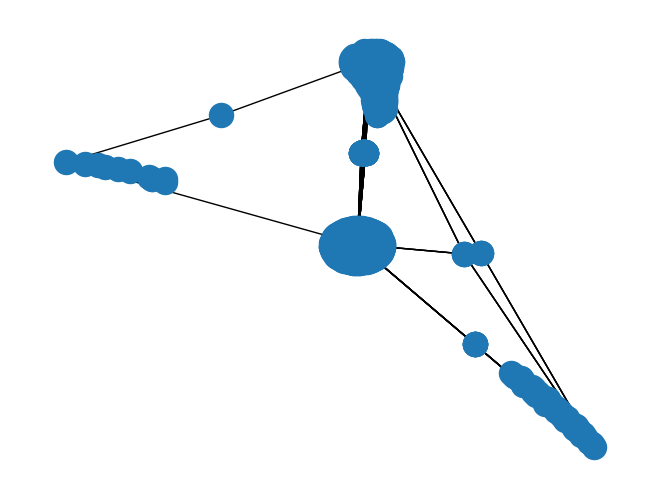

In [ ]:
import networkx as nx
import pandas as pd

# Load edge list from CSV file
df = pd.read_excel('tes.xlsx')

# Create weighted graph from edge list
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calculate weighted degree centrality
degree_dict = dict(G.degree(weight='Weight'))
nx.draw(G)
# print(degree_dict)

# Print the WDC values for the first 10 nodes
# for node, wdc_value in list(wdc.items())[:10]:
#     print(f'Node {node}: WDC = {wdc_value:.2f}')

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load edge list from CSV file
df = pd.read_excel('tes.xlsx')

# Create weighted graph from edge list
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calculate weighted degree centrality
degree_dict = dict(G.degree(weight='Weight'))

# Define color map based on node weights
color_map = []
for node in G.nodes():
    if degree_dict[node] >= 3:
        color_map.append('green')
    else:
        color_map.append('blue')

# Draw graph with node colors
fig, ax = plt.subplots(figsize=(15, 20))
nx.draw(G, node_color=color_map)
plt.show()


In [ ]:
!pip install community
!pip install --upgrade python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


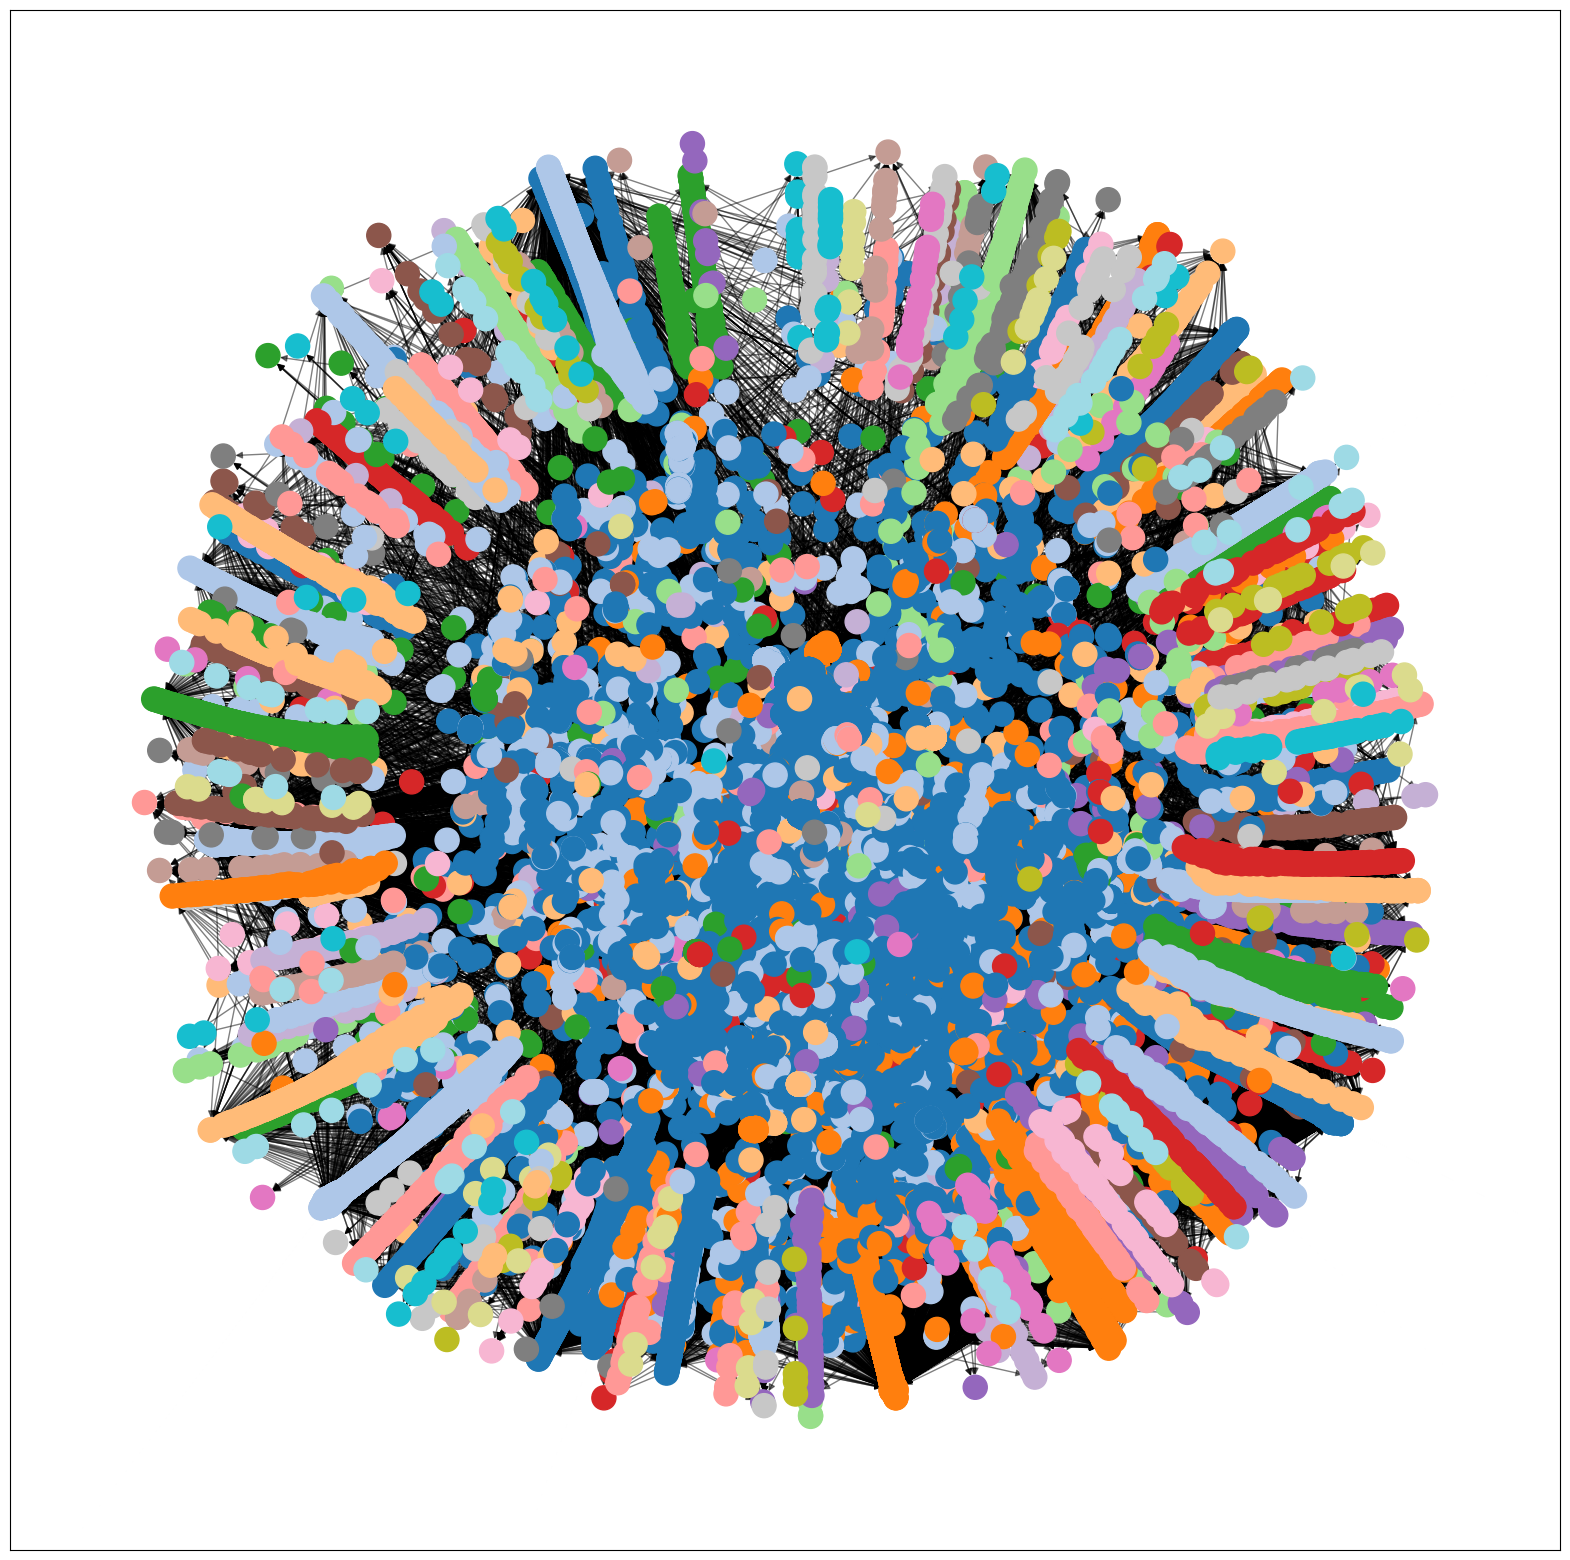

In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import asyn_lpa_communities
import matplotlib.pyplot as plt

# Load data from Excel file
df = pd.read_excel('SNA_All_Nodes.xlsx')

# # Create a directed graph using NetworkX
# G = nx.DiGraph()

# # Add edges from the DataFrame
# for _, row in df.iterrows():
#     G.add_edge(row['Source'], row['Target'])
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Use asyn_lpa_communities() for community detection
communities_generator = asyn_lpa_communities(G, weight='Weight')
communities = [list(c) for c in communities_generator]

# Create a dictionary of colors for each community
#color_map = {0: 'red', 1: 'blue', 2: 'green'}

# Create a dictionary of colors for each community
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i

# Plot the graph with nodes colored by community
pos = nx.spring_layout(G)
plt.figure(1,figsize=(20,20))
nx.draw_networkx_nodes(G, pos, node_color=[color_map[node] for node in G.nodes()], cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

sub_reddi = ['funny','AskReddit','gaming','aww','music','pics','worldNews','Science','videos','todayilearned','movies','news','EarthPorn','gifs','IAmA','food','askscience','jokes','explainlikeiamfive','art']

for temp in sub_reddi:
  # Load data from Excel file
  df = pd.read_excel(temp+'.xlsx')

  G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

  # Compute in-degree and out-degree of each node
  in_degrees = dict(G.in_degree())
  out_degrees = dict(G.out_degree())

  # Plot the degree distributions on a log-log scale
  in_degree_sequence = sorted([d for n, d in in_degrees.items()], reverse=True)
  out_degree_sequence = sorted([d for n, d in out_degrees.items()], reverse=True)

  plt.loglog(in_degree_sequence, 'b-', marker='o')
  plt.loglog(out_degree_sequence, 'r-', marker='o')
  plt.legend(['In-degree', 'Out-degree'])
  plt.xlabel('Degree')
  plt.ylabel('Frequency')
  plt.savefig(temp, bbox_inches='tight')
  plt.show()